In [1]:
import os
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')

1972 66
1974 76
1976 78
1978 70
1980 81
1982 86
1984 93
1986 96
1988 96
1990 95
1992 97
1994 95
1996 97
1998 98
2000 99
2002 99
2004 99
2006 102
2008 102
2010 102
2012 102
2014 102


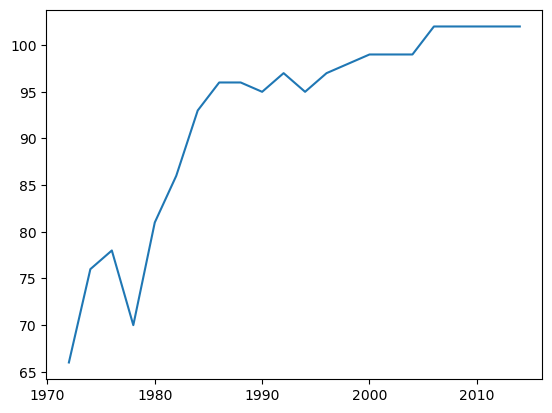

In [2]:
""" load variable_list from each interval and plot variable count """

start_year = 1972
end_year = 2016
step = 2
interval_length = 4

variable_counts = []

for year in range(start_year, end_year, step):
    dir_path = f"../out/belief networks/{year}-{year + interval_length}, R=0.2, Condition=None"
    var_names_path = os.path.join(dir_path, "variables_list.csv")
    with open(var_names_path) as file:
        variables_list = file.read().splitlines()
    variable_counts.append(len(variables_list))

plt.plot(range(start_year, end_year, step), variable_counts)

# print ordered pairs for each point on line graph
for year, count in zip(range(start_year, end_year, step), variable_counts):
    print(year, count)

In [3]:
"""
try making belief networks using only the variables present in 1974 and 1984, respectively
"""

dir_path = f"../out/belief networks/1974-1978, R=0.2, Condition=None"
var_names_path = os.path.join(dir_path, "variables_list.csv")
with open(var_names_path) as file:
        variables_list_1974 = file.read().splitlines()

dir_path = f"../out/belief networks/1984-1988, R=0.2, Condition=None"
var_names_path = os.path.join(dir_path, "variables_list.csv")
with open(var_names_path) as file:
        variables_list_1984 = file.read().splitlines()

In [4]:
""" Importing the GSS dataset. """

import pyreadstat as prs
from clean_data_1 import transform_dataframe_1

raw_df, meta = prs.read_sas7bdat("../dat/gss7222_r3.sas7bdat")

""" Cleaning the data. """
 
df, metadata = transform_dataframe_1(raw_df)    # df contains all our data, metadata contains some other random shit 

PyreadstatError: File ../dat/gss7222_r3.sas7bdat does not exist!

In [7]:
from make_belief_network import make_belief_network

bn_dict = {}
for year in range(1974, 2018, 2):
    # Timeframe - specify the start year and duration of the timeframe
    start_year = year
    duration = 4
    timeframe = list(range(start_year, start_year+duration))

    # Parameters
    method = "spearman"     # method for calculating correlation
    threshold = 0           # threshold for correlation
    sample_threshold = 0    # threshold for sample size
    regularisation = 0.2    # regularisation parameter for partial correlation

    """ Note: for now, we keep the threshold and sample threshold at 0. 
    Regularisation can be set between around 1.5 and 2.5. """
    BN, variables_list, correlation_matrix_partial = make_belief_network(df, variables_list_1974, timeframe, method=method, is_partial=True, threshold=threshold, 
                                                                     sample_threshold=sample_threshold, regularisation=regularisation)
    
    bn_dict[(year, 1974)] = (BN, variables_list)

    if year >= 1984:
        BN, variables_list, correlation_matrix_partial = make_belief_network(df, variables_list_1984, timeframe, method=method, is_partial=True, threshold=threshold, 
                                                                     sample_threshold=sample_threshold, regularisation=regularisation)
        bn_dict[(year, 1984)] = (BN, variables_list)

NameError: name 'variables_list_1974' is not defined